# White Paper Plots
Notebook to make plots for the white paper to Jay Hnilo.
Feb 2024, Jimmy Butler

In [1]:
# load packages
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(tidyverse)
library(data.table)
library(gridExtra)
library(knitr)
library(ggExtra)

# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/projection.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_c

### Figure 1

A figure showcasing both asymptotically independent and asymptotically dependent datasets, along with their marginal distributions, and some notion of the compoundedness of the extremes.

In [2]:
# uploading AI and AD datasets from Cooley et al. (2019)
load('~/isolines_uq/data/cooley_data/karachiDatDaily.Rdata')
karachi_data <- karachiDatDaily[,c(3,4)]
colnames(karachi_data) <- c('Temp', 'RelHum')
load('~/isolines_uq/data/cooley_data/santaAnaBivariate.Rdata')
santa_ana_data <- saDat[,c(4,5)]

In [3]:
ignition_dates = saDat %>% filter(date == '10/21/07' | date == '11/15/08' | date == '10/25/03')
heat_wave_dates = karachiDatDaily %>% filter(date >= '06/20/15', date <= '06/25/15')
heat_wave_dates

date,month,temp,relHum,heatIdx,hiCat
<dates>,<ord>,<dbl>,<dbl>,<dbl>,<int>
06/20/15,Jun,103.44133,43.95002,121.6384,4
06/21/15,Jun,107.05479,30.62729,118.4210,4
06/22/15,Jun,107.28154,39.97621,128.9691,4
06/23/15,Jun,105.26463,40.34708,122.5740,4
06/24/15,Jun,95.03862,65.89252,118.6330,4
06/25/15,Jun,98.06191,59.28345,122.0091,4


In [4]:
pltSA <- ggplot() + geom_point(data=santa_ana_data, aes(x = windspeeds, y = neg_relHum), alpha=0.2) + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red') +
xlab('Windspeed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, Southern CA') + 
theme(axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24))
pltSA_margins <- ggMarginal(pltSA, type='histogram')

In [5]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = Temp, y = RelHum), alpha=0.2) + geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red') + xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi, Pakistan') + 
theme(axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

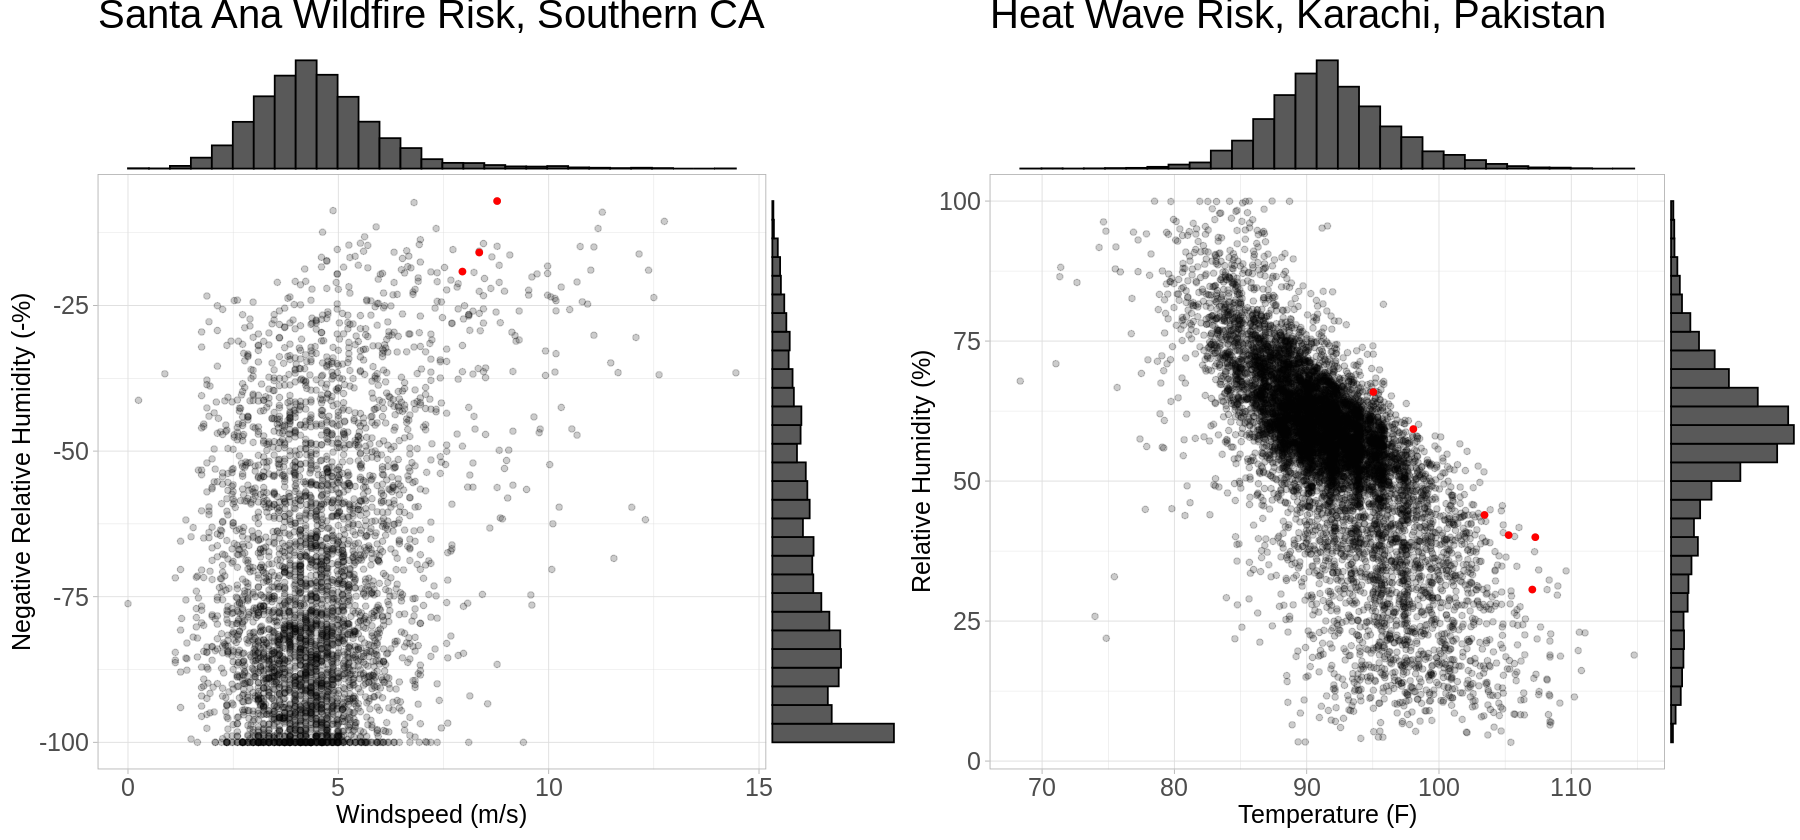

In [6]:
options(repr.plot.width=15, repr.plot.height=7, scipen=999)
grid.arrange(pltSA_margins, pltKa_margins, ncol = 2)

In [11]:
saDat[c(1, 3, 4, 5)] %>% write_csv(., '~/isolines_uq/data/cooley_data/santa_ana_wildfires.csv')

,date,temp,windspeeds,neg_relHum
,<dates>,<dbl>,<dbl>,<dbl>
1,09/01/73,27.200,4.850,-80.97217
2,09/02/73,28.450,4.750,-84.61288
3,09/03/73,27.600,5.225,-87.12178
4,09/04/73,22.775,5.125,-86.90842
5,09/05/73,26.075,4.725,-81.83391
6,09/06/73,32.450,5.475,-65.78645
7,09/07/73,31.525,6.075,-89.62047
8,09/08/73,26.525,4.600,-85.06782
9,09/09/73,26.875,5.850,-83.47797
